In [20]:
!pip install mne


imports

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.io import read_raw_edf



In [22]:
SUBJECT = 1                 # Subject ID (1..109)
RUNS = [6, 10, 14]          # Common motor imagery runs (example: runs 6,10,14). Change as desired.
DATA_PATH = os.path.expanduser('~/mne_data')   # where MNE will store dataset
RESAMPLE_SF = 128           # Hz - None to keep original
NOTCH_FREQ = 50             # set 50 or 60 depending on your mains frequency (set None to skip)

data loading


In [23]:
psd_welch = lambda raw, **kwargs: raw.compute_psd(**kwargs)
raw = eegbci.load_data(SUBJECT, RUNS, path=DATA_PATH, verbose=True)
print('Files:', raw)

Files: [PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf'), PosixPath('/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf')]


file reading

In [24]:
file_path = '/root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


information

In [25]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>


In [26]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_get_duration_string',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_raw_extras',
 '_raw_lengths',
 '_read_co

filtering unwanted frequencies

In [27]:
raw.filter(l_freq= 1, h_freq= 40)
raw.notch_filter(freqs=50)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 529 samples (3.306 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge

<RawEDF | S001R06.edf, 64 x 20000 (125.0 s), ~9.8 MiB, data loaded>

In [28]:
print(raw.info['ch_names'])


['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


plot (channels vs time)

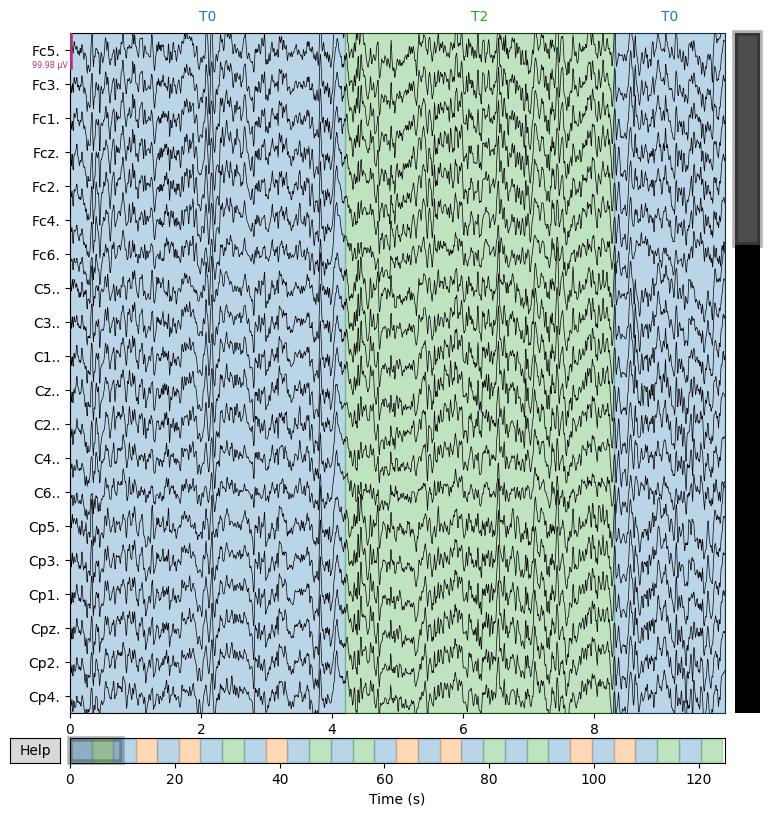

In [29]:
fig = raw.plot(n_channels=20, scalings='auto', title='EEG Signals', show=False)
fig.show()

power spectral density

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


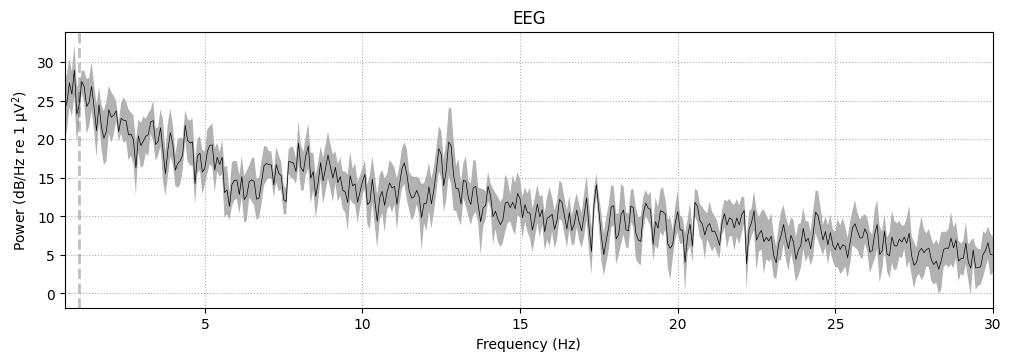

In [30]:
psd = raw.compute_psd(fmin=0.5, fmax=30, tmax=42, picks='eeg', method='welch')
fig = psd.plot(average=True, dB=True, show=False)
plt.show()


In [ ]:
#position channels

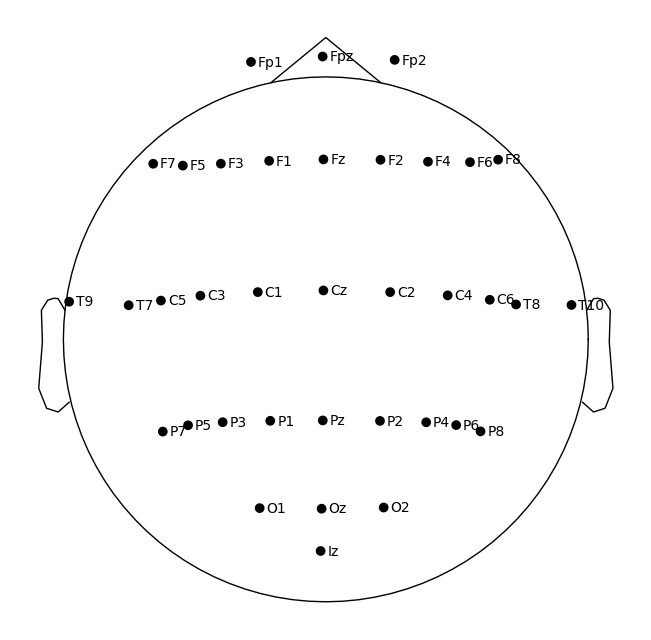

In [32]:
#  Clean and standardize channel names
def clean_channel_name(name):
    # remove all dots and extra characters
    name = name.replace('.', '').replace('..', '')
    name = name.upper()
    return name

raw.rename_channels(clean_channel_name)

# convert names to proper capitalization
rename_dict = {ch: ch.capitalize() for ch in raw.ch_names}
raw.rename_channels(rename_dict)

#  Apply montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Keep only valid channels
valid_chs = set(montage.ch_names)
chs_to_drop = [ch for ch in raw.ch_names if ch not in valid_chs]

if chs_to_drop:
    print(f" Dropping {len(chs_to_drop)} channels not in montage:\n{chs_to_drop}")
    # only drop if not all channels would be removed
    if len(chs_to_drop) < len(raw.ch_names):
        raw.drop_channels(chs_to_drop)
    else:
        print(" Not dropping anything because none match montage; will use auto coordinates instead.")
        raw.set_montage('standard_1020', on_missing='auto')

# Visual check
fig = raw.plot_sensors(show_names=True)
fig.show()

topomaps

Filtering Delta band: 0.5-4 Hz
Filtering Theta band: 4-8 Hz
Filtering Alpha band: 8-13 Hz
Filtering Beta band: 13-30 Hz
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)
Effective window size : 1.600 (s)


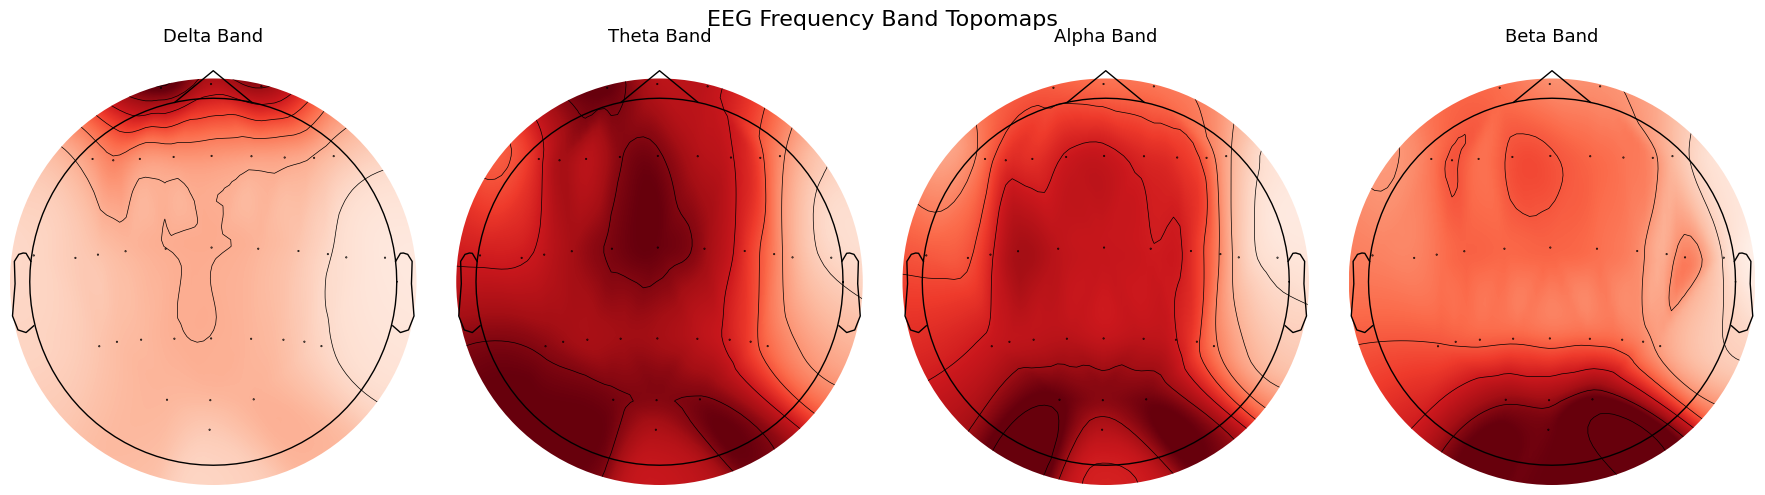

In [33]:
# --- Define EEG frequency bands ---
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30)
}

# --- Filter data into each band ---
band_data = {}
for band, (l_freq, h_freq) in bands.items():
    print(f"Filtering {band} band: {l_freq}-{h_freq} Hz")
    band_data[band] = raw.copy().filter(l_freq=l_freq, h_freq=h_freq, verbose=False)

# --- Compute Power Spectral Density (PSD) and mean power per channel ---
band_power = {}
for band, data in band_data.items():
    psd, freqs = mne.time_frequency.psd_array_welch(
        data.get_data(), sfreq=data.info['sfreq'], fmin=bands[band][0], fmax=bands[band][1], n_fft=256, average='mean'
    )
    band_power[band] = psd.mean(axis=1)  # average power across time




#  Plot topomaps for each band
fig, axes = plt.subplots(1, len(bands), figsize=(18, 5))
for ax, band in zip(axes, bands.keys()):
    try:
        mne.viz.plot_topomap(band_power[band], pos=raw.info, axes=ax, show=False)
        ax.set_title(f"{band} Band", fontsize=13)
    except Exception as e:
        print(f"Skipping {band} due to error: {e}")
        ax.axis("off")

plt.suptitle("EEG Frequency Band Topomaps", fontsize=16)
plt.tight_layout()
plt.show()


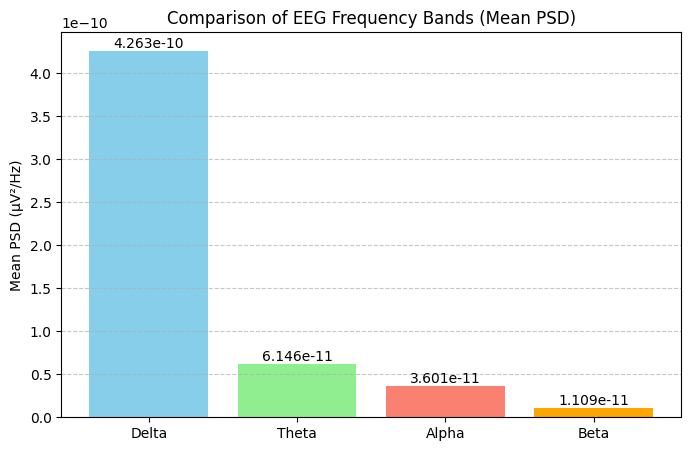

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
bands_list = list(band_power.keys())
mean_power_per_band = [band_power[band].mean() for band in bands_list]  # average across channels

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(bands_list, mean_power_per_band, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.ylabel("Mean PSD (µV²/Hz)")
plt.title("Comparison of EEG Frequency Bands (Mean PSD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.3e}', ha='center', va='bottom')

plt.show()
